**Acesso ao Conjunto de Dados**

In [1]:
# Baixar e descompactar o dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip -O har_dataset.zip
!unzip -q har_dataset.zip -d har_dataset

--2024-12-03 20:19:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘har_dataset.zip’

har_dataset.zip         [         <=>        ]  58.17M  32.6MB/s    in 1.8s    

2024-12-03 20:19:13 (32.6 MB/s) - ‘har_dataset.zip’ saved [60999314]



In [2]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Definir o caminho dos arquivos
dataset_path = 'har_dataset/UCI HAR Dataset/'

# Carregar rótulos de atividades e features
activity_labels = pd.read_csv(dataset_path + 'activity_labels.txt', header=None, delim_whitespace=True, names=['id', 'activity'])
features = pd.read_csv(dataset_path + 'features.txt', header=None, delim_whitespace=True, names=['id', 'feature'])

# Verificar e corrigir nomes duplicados de colunas
features['feature'] = features['feature'].apply(lambda x: x.strip())
unique_features = []
for feature in features['feature']:
    if feature in unique_features:
        count = 1
        new_feature = feature + f'_{count}'
        while new_feature in unique_features:
            count += 1
            new_feature = feature + f'_{count}'
        unique_features.append(new_feature)
    else:
        unique_features.append(feature)

# Carregar dados de treinamento
X_train = pd.read_csv(dataset_path + 'train/X_train.txt', delim_whitespace=True, header=None, names=unique_features)
y_train = pd.read_csv(dataset_path + 'train/y_train.txt', header=None, names=['activity'])
subject_train = pd.read_csv(dataset_path + 'train/subject_train.txt', header=None, names=['subject'])

# Carregar dados de teste
X_test = pd.read_csv(dataset_path + 'test/X_test.txt', delim_whitespace=True, header=None, names=unique_features)
y_test = pd.read_csv(dataset_path + 'test/y_test.txt', header=None, names=['activity'])
subject_test = pd.read_csv(dataset_path + 'test/subject_test.txt', header=None, names=['subject'])

# Combinar os dados de treinamento e teste
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
subjects = pd.concat([subject_train, subject_test], axis=0).reset_index(drop=True)

# Combinar todas as informações em um único DataFrame
data = pd.concat([subjects, y, X], axis=1)

<ipython-input-3-8ebc103f18ef>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv(dataset_path + 'activity_labels.txt', header=None, delim_whitespace=True, names=['id', 'activity'])
<ipython-input-3-8ebc103f18ef>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(dataset_path + 'features.txt', header=None, delim_whitespace=True, names=['id', 'feature'])
<ipython-input-3-8ebc103f18ef>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(dataset_path + 'train/X_train.txt', delim_whitespace=True, header=None, names=unique_features)
<ipython-input-3-8ebc103f18ef>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is depr

**Análise Exploratória**

   subject  activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.996091         -0.983403         -0.990675         -0.997099   
4         -0.998139         -0.980817         -0.990482         -0.998321   

   tBodyAcc-mad()-Y  ...  fBodyBodyGyroJerkMag-mea

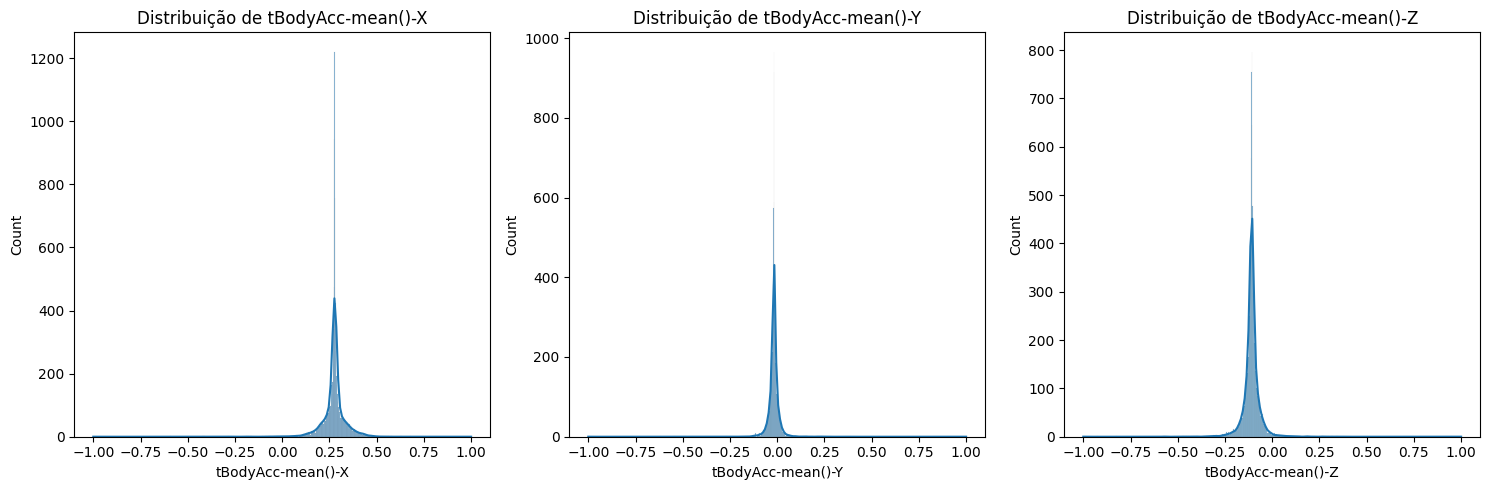

In [4]:
# Examinar as distribuições das variáveis e detectar padrões
print(data.head())
print(data.columns.tolist())

# Selecionar um subconjunto de colunas para análise
columns_to_plot = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

# Plotar as distribuições das variáveis selecionadas
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot, 1):
    if column in data.columns:
        plt.subplot(1, 3, i)
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribuição de {column}')
    else:
        print(f"Coluna {column} não encontrada no DataFrame")

plt.tight_layout()
plt.show()

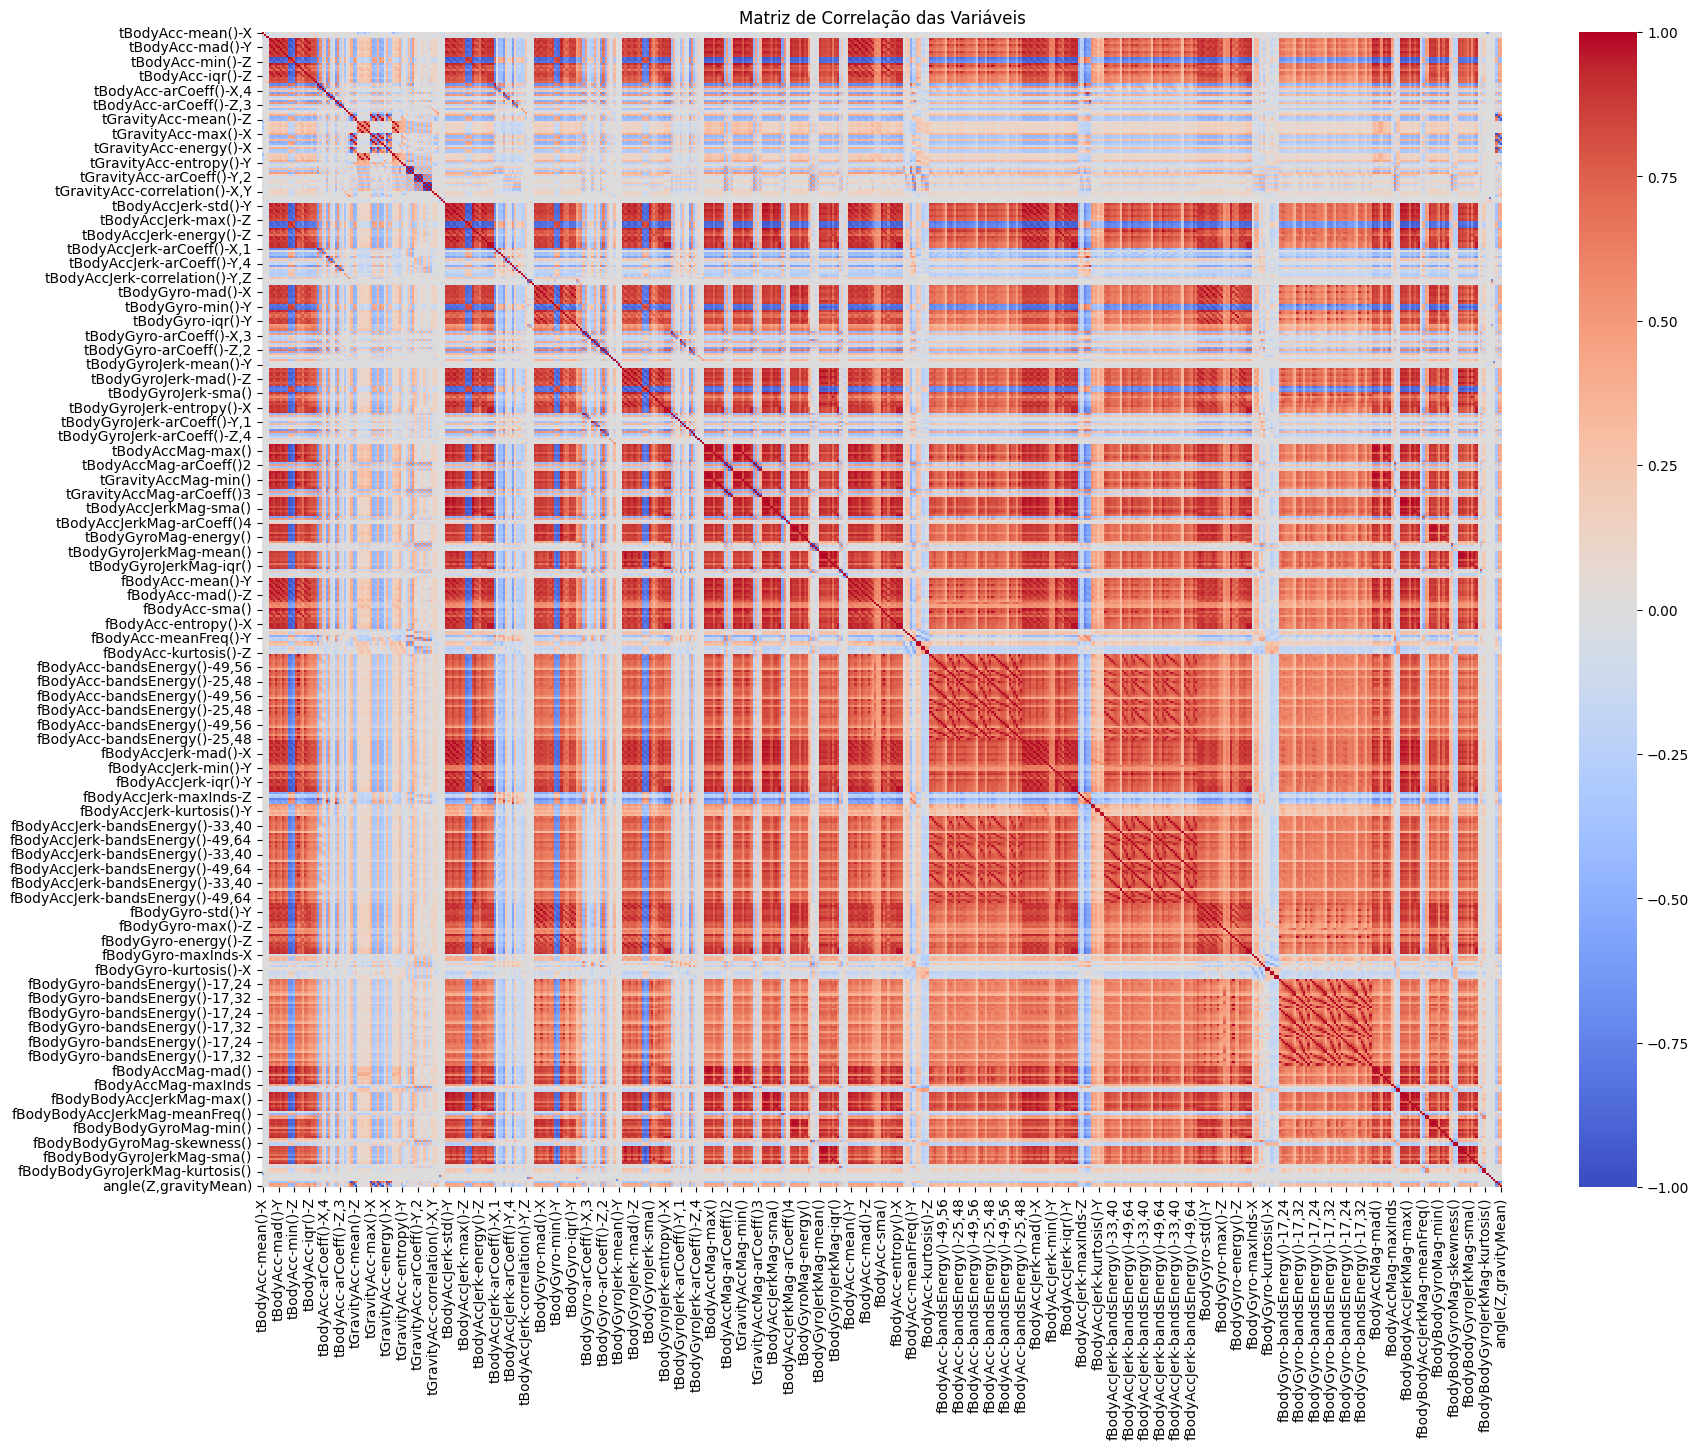

In [5]:
# Avaliar possíveis correlações entre as variáveis

# Calcular a matriz de correlação
corr_matrix = data[features['feature'].values].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

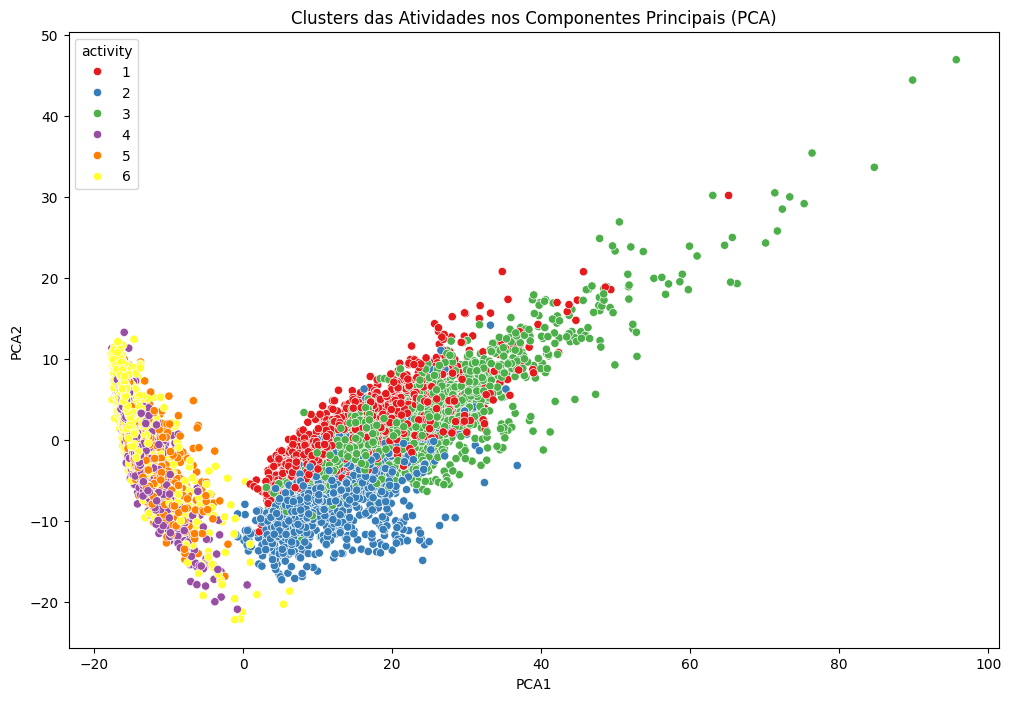

In [6]:
# Reduzir a dimensionalidade dos dados usando PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Padronizar os dados antes de aplicar PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features['feature'].values])

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Adicionar os componentes principais ao DataFrame
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Plotar os clusters das atividades nos componentes principais
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='activity', data=data, palette='Set1')
plt.title('Clusters das Atividades nos Componentes Principais (PCA)')
plt.show()

**Implementação do Algoritmo K-means**

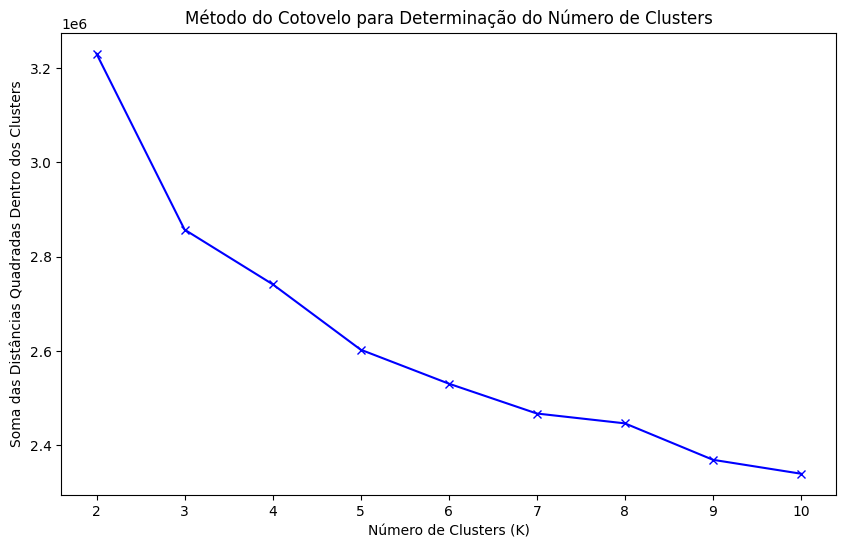

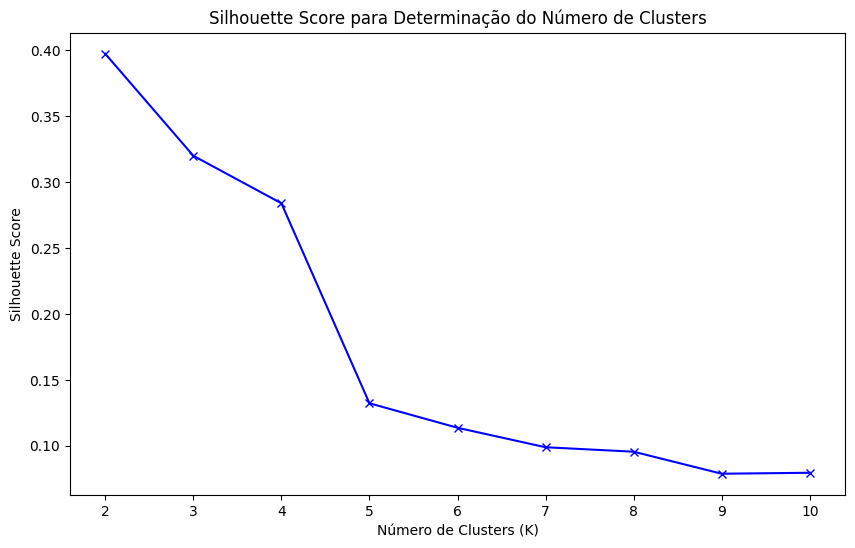

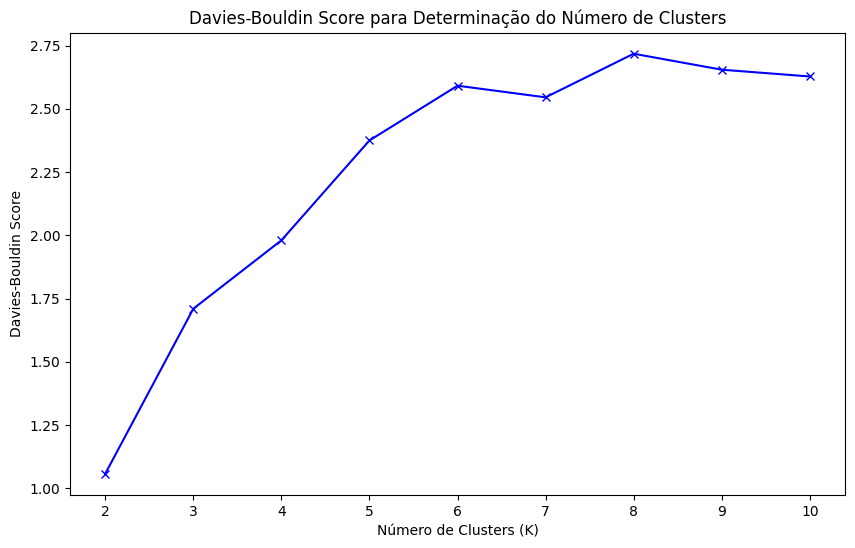

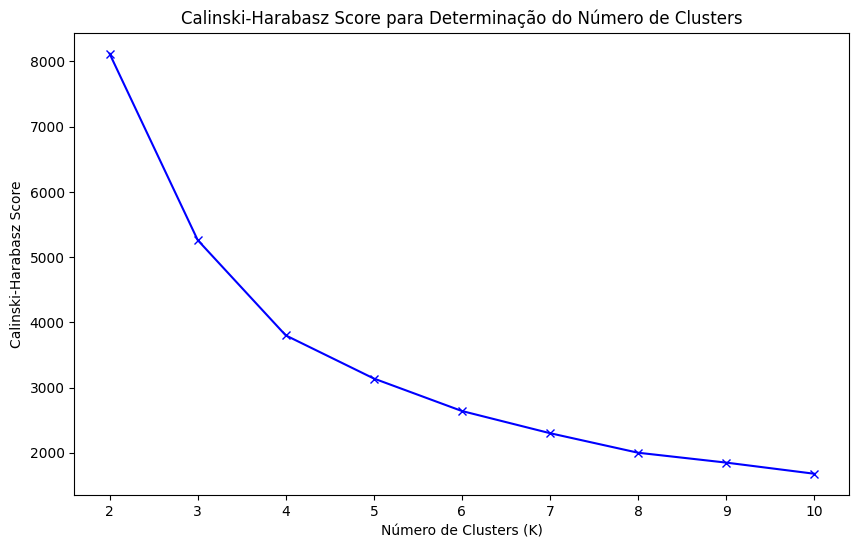

O número ideal de clusters (K) é: 2


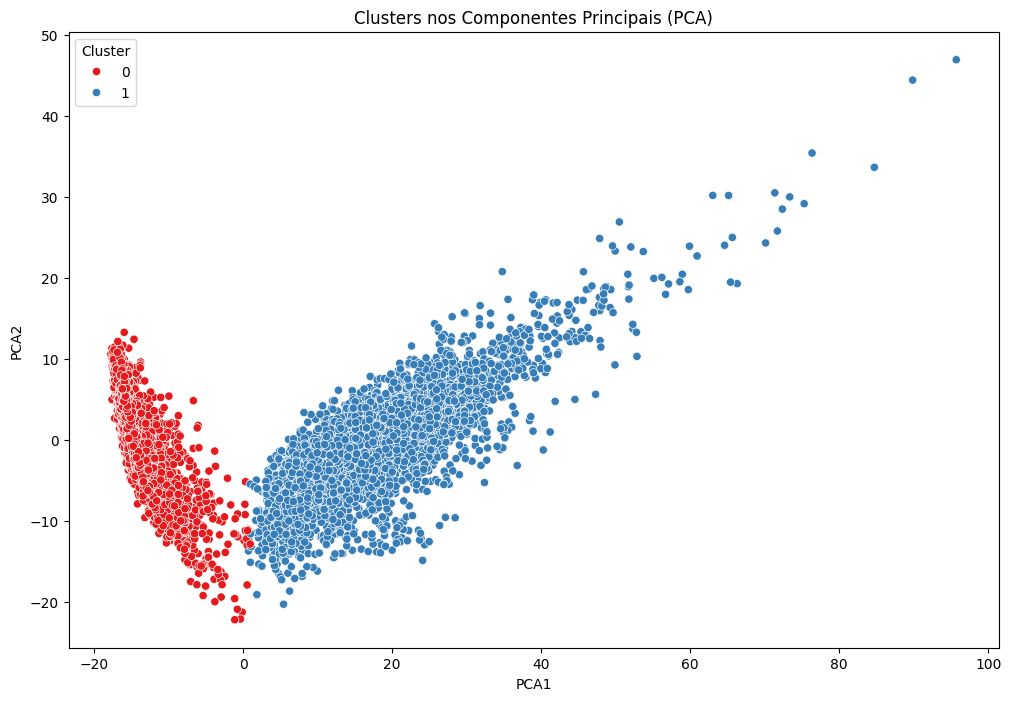

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Lista para armazenar a soma das distâncias quadradas dentro dos clusters para cada K
sse = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Testar K de 2 a 10
K_range = range(2, 11)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)

    # Adicionar a soma das distâncias quadradas dentro dos clusters para o método do cotovelo
    sse.append(kmeans.inertia_)

    # Calcular e adicionar o silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_scaled, labels))

    # Calcular e adicionar o Davies-Bouldin score
    davies_bouldin_scores.append(davies_bouldin_score(data_scaled, labels))

    # Calcular e adicionar o Calinski-Harabasz score
    calinski_harabasz_scores.append(calinski_harabasz_score(data_scaled, labels))

# Método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma das Distâncias Quadradas Dentro dos Clusters')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.show()

# Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Determinação do Número de Clusters')
plt.show()

# Davies-Bouldin Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, davies_bouldin_scores, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score para Determinação do Número de Clusters')
plt.show()

# Calinski-Harabasz Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, calinski_harabasz_scores, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score para Determinação do Número de Clusters')
plt.show()

# Escolher o número de clusters baseado nos métodos do cotovelo e silhouette
optimal_K = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f'O número ideal de clusters (K) é: {optimal_K}')

# Aplicar K-means com o número ótimo de clusters
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualizar os clusters nos componentes principais
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters nos Componentes Principais (PCA)')
plt.show()

**Otimização e Ajustes**

In [8]:
# Normalização dos dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features['feature'].values])

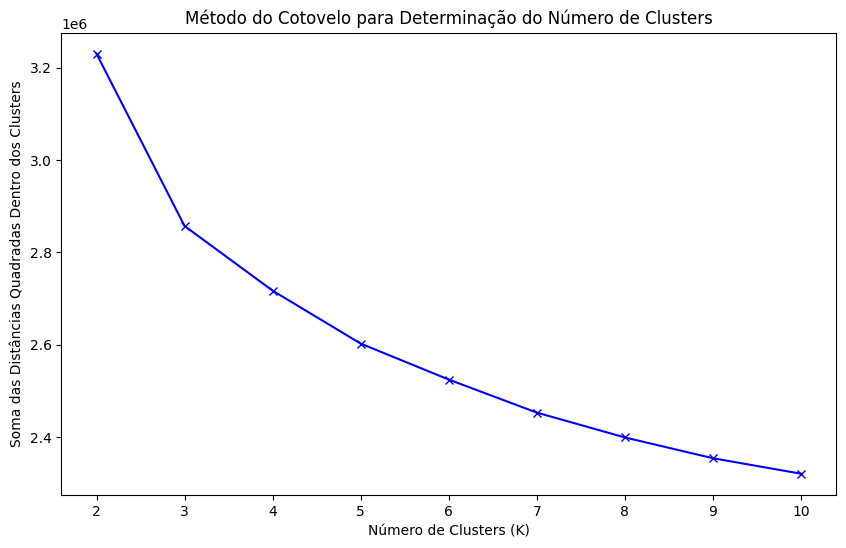

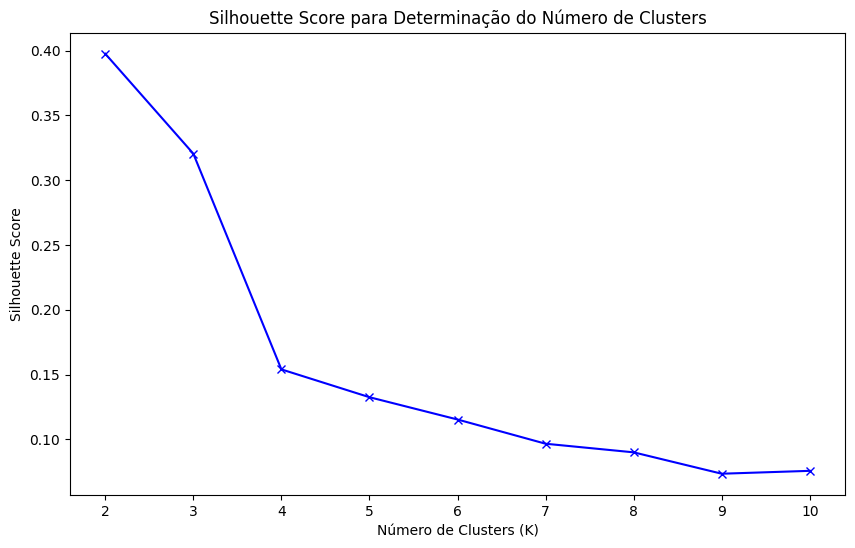

O número ideal de clusters (K) é: 2


In [9]:
# Inicialização K-means++
sse = []
silhouette_scores = []
n_init = 10  # Número de inicializações diferentes

K_range = range(2, 11)

for K in K_range:
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init=n_init, random_state=42)
    kmeans.fit(data_scaled)

    # Soma das Distâncias Quadradas Dentro dos Clusters (Método do Cotovelo)
    sse.append(kmeans.inertia_)

    # Calcular Silhouette Score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma das Distâncias Quadradas Dentro dos Clusters')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.show()

# Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Determinação do Número de Clusters')
plt.show()

# Escolher o número de clusters baseado nos métodos do cotovelo e silhouette
optimal_K = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f'O número ideal de clusters (K) é: {optimal_K}')

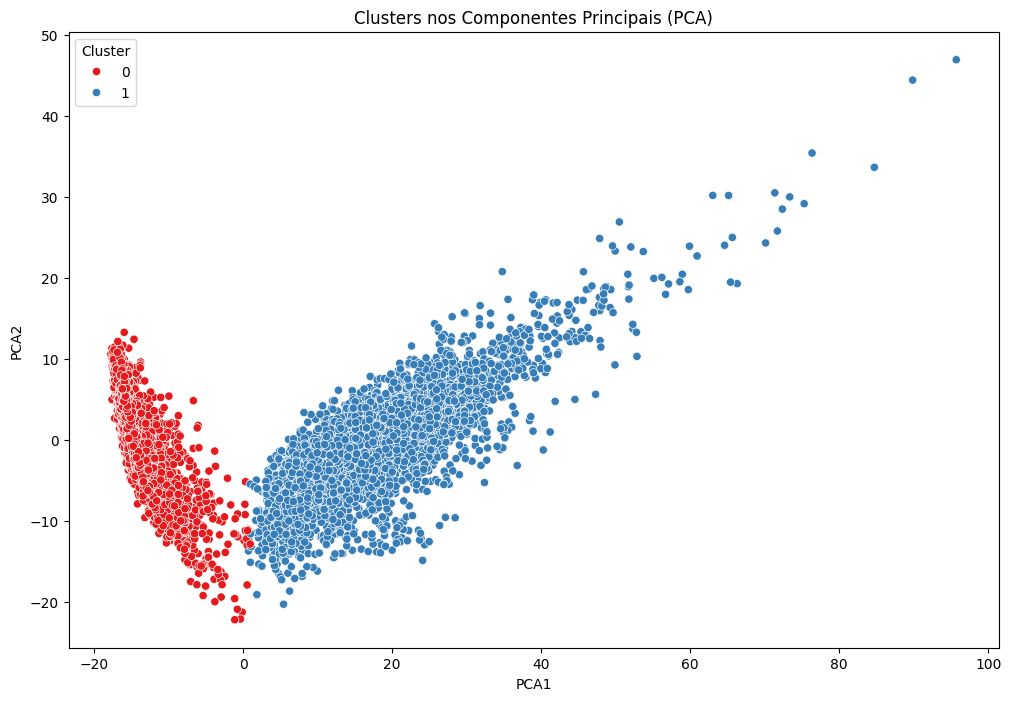

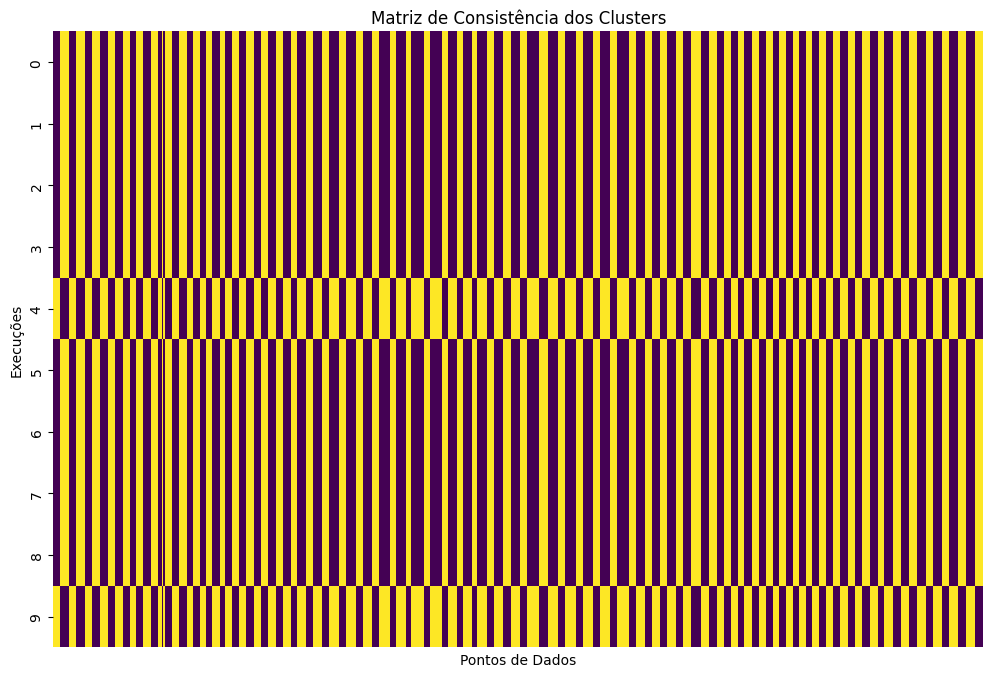

In [11]:
# Repetições e Estabilidade
kmeans = KMeans(n_clusters=optimal_K, init='k-means++', n_init=n_init, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualizar os clusters nos componentes principais
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters nos Componentes Principais (PCA)')
plt.show()

# Avaliar estabilidade dos clusters
n_executions = 10  # Número de execuções para verificar a consistência

clusters_labels = np.zeros((n_executions, data_scaled.shape[0]))

for i in range(n_executions):
    kmeans = KMeans(n_clusters=optimal_K, init='k-means++', n_init=n_init, random_state=42 + i)
    clusters_labels[i] = kmeans.fit_predict(data_scaled)

# Verificar a consistência dos clusters
from scipy.stats import mode

# Calcular o modo dos rótulos para cada ponto
mode_labels = mode(clusters_labels, axis=0).mode[0]

# Calcular a proporção de pontos que permanecem no mesmo cluster
consistency = np.mean([np.all(clusters_labels[i] == mode_labels) for i in range(n_executions)])

# Visualização adicional da consistência
plt.figure(figsize=(12, 8))
sns.heatmap(clusters_labels, cmap='viridis', cbar=False, xticklabels=False)
plt.title('Matriz de Consistência dos Clusters')
plt.xlabel('Pontos de Dados')
plt.ylabel('Execuções')
plt.show()

**Análise e Visualização dos Resultados**

In [12]:
# Métricas de Avaliação

from mpl_toolkits.mplot3d import Axes3D

# Calcular o silhouette score para o K selecionado
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
davies_bouldin_avg = davies_bouldin_score(data_scaled, data['Cluster'])
calinski_harabasz_avg = calinski_harabasz_score(data_scaled, data['Cluster'])

print(f'Silhouette Score para {optimal_K} clusters: {silhouette_avg:.2f}')
print(f'Davies-Bouldin Score para {optimal_K} clusters: {davies_bouldin_avg:.2f}')
print(f'Calinski-Harabasz Score para {optimal_K} clusters: {calinski_harabasz_avg:.2f}')
print(f'Inércia para {optimal_K} clusters: {sse[K_range.index(optimal_K)]:.2f}')

Silhouette Score para 2 clusters: 0.40
Davies-Bouldin Score para 2 clusters: 1.06
Calinski-Harabasz Score para 2 clusters: 8118.40
Inércia para 2 clusters: 3230631.64


In [ ]:
# Reduzir a dimensionalidade para 3 componentes principais
from sklearn.decomposition import PCA

# Definir as colunas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Reduzir para 3 componentes
pca = PCA(n_components=3)
pca_components = pca.fit_transform(data[numeric_columns])  # Apenas colunas numéricas
data[['PCA1', 'PCA2', 'PCA3']] = pca_components

# Interpretação dos Clusters
# Adicionar rótulos das atividades para análise
data['Activity_Label'] = data['activity'].map(dict(activity_labels.values))

# Mostrar o tamanho de cada cluster
cluster_sizes = data['Cluster'].value_counts().sort_index()
print('Tamanho de cada cluster:')
print(cluster_sizes)

# Analisar as características médias de cada cluster para apenas variáveis numéricas
cluster_means = data.groupby('Cluster')[numeric_columns].mean()
print('Características médias de cada cluster:')
print(cluster_means)

Tamanho de cada cluster:
Cluster
0    5629
1    4670
Name: count, dtype: int64
Características médias de cada cluster:
           subject  activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
Cluster                                                              
0        16.648605  5.021141           0.274834          -0.015752   
1        15.541113  1.941328           0.273760          -0.020144   

         tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  \
Cluster                                                          
0                -0.106891         -0.975990         -0.937206   
1                -0.111376         -0.163965          0.004512   

         tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  ...  \
Cluster                                                        ...   
0               -0.942759         -0.978429         -0.937832  ...   
1               -0.215665         -0.217943         -0.028928  ...   

         fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyA

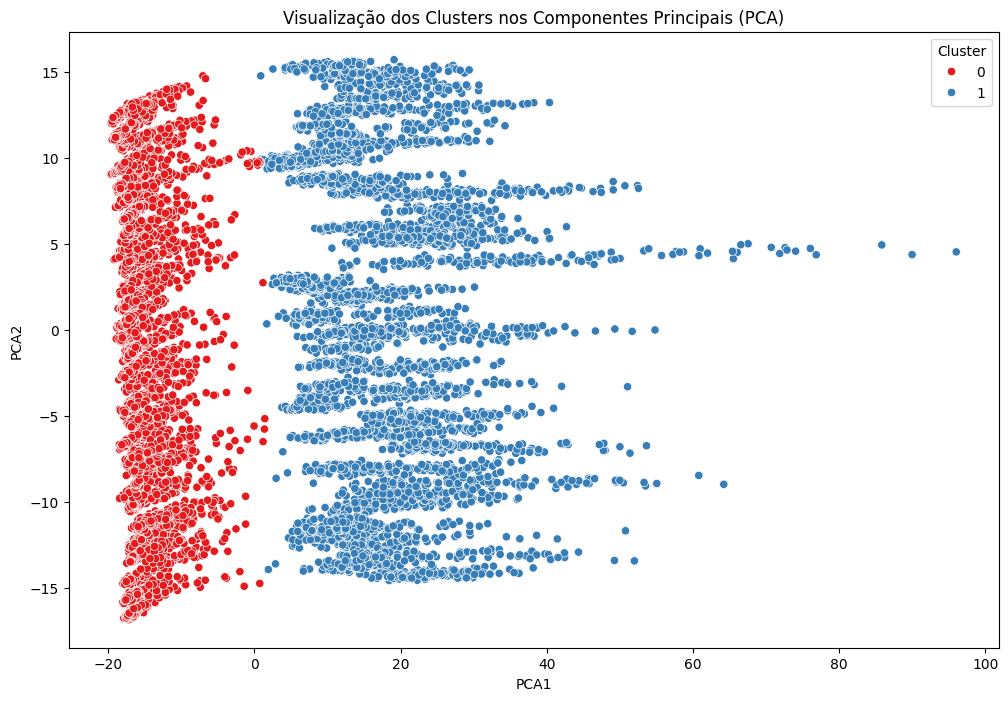

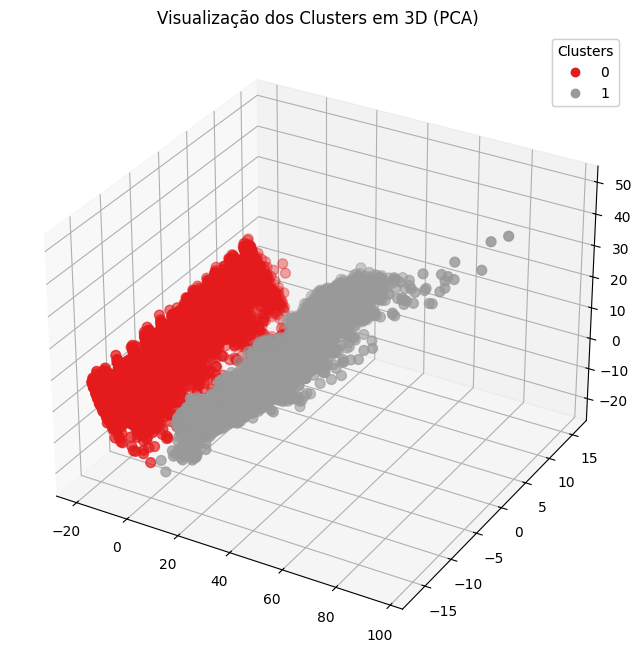

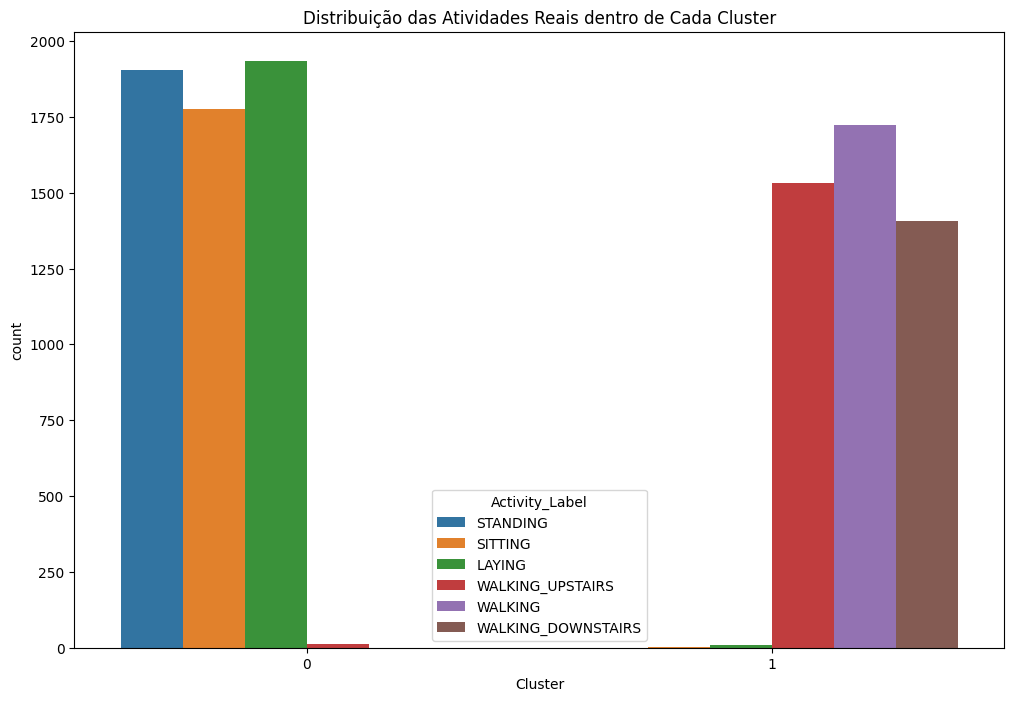

In [ ]:
# Visualizações

# Visualizar os clusters em 2D usando PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set1')
plt.title('Visualização dos Clusters nos Componentes Principais (PCA)')
plt.show()

# Visualizar os clusters em 3D usando PCA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=data['Cluster'], cmap='Set1', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.title('Visualização dos Clusters em 3D (PCA)')
plt.show()

# Visualizar a distribuição das atividades reais dentro de cada cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Cluster', hue='Activity_Label', data=data)
plt.title('Distribuição das Atividades Reais dentro de Cada Cluster')
plt.show()